## Milestone 4 Example Solution

_Using the test set, compute and plot a confusion matrix of all command words._

In [9]:
# Define the required variables as did in previous milestones
from pathlib import Path
import pandas

current_dir = Path('.')
data_path = current_dir / 'google_speech'
train_audio_path = data_path / 'train' / 'audio'
train_data = pandas.read_csv(data_path / "train" / "train.csv")
example_audio_path = train_audio_path / 'zero' / 'ffd2ba2f_nohash_1.wav'

In [2]:
# Let's load the arrays containing the training and test dataset created in the previous milestone,
# together with the predictions of the model trained previously
import numpy as np

with np.load('arrays.npz') as data:
    y_pred = data['y_pred']
    y_test = data['y_test']
    y_train = data['y_train']
    X_test = data['X_test']
    X_train = data['X_train']

In [10]:
from sklearn.metrics import confusion_matrix
import seaborn
import matplotlib.pyplot as plt
import pandas
from sklearn.preprocessing import LabelEncoder

C:\Users\smasneri\Miniconda3\envs\speechrec2\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<AxesSubplot:>

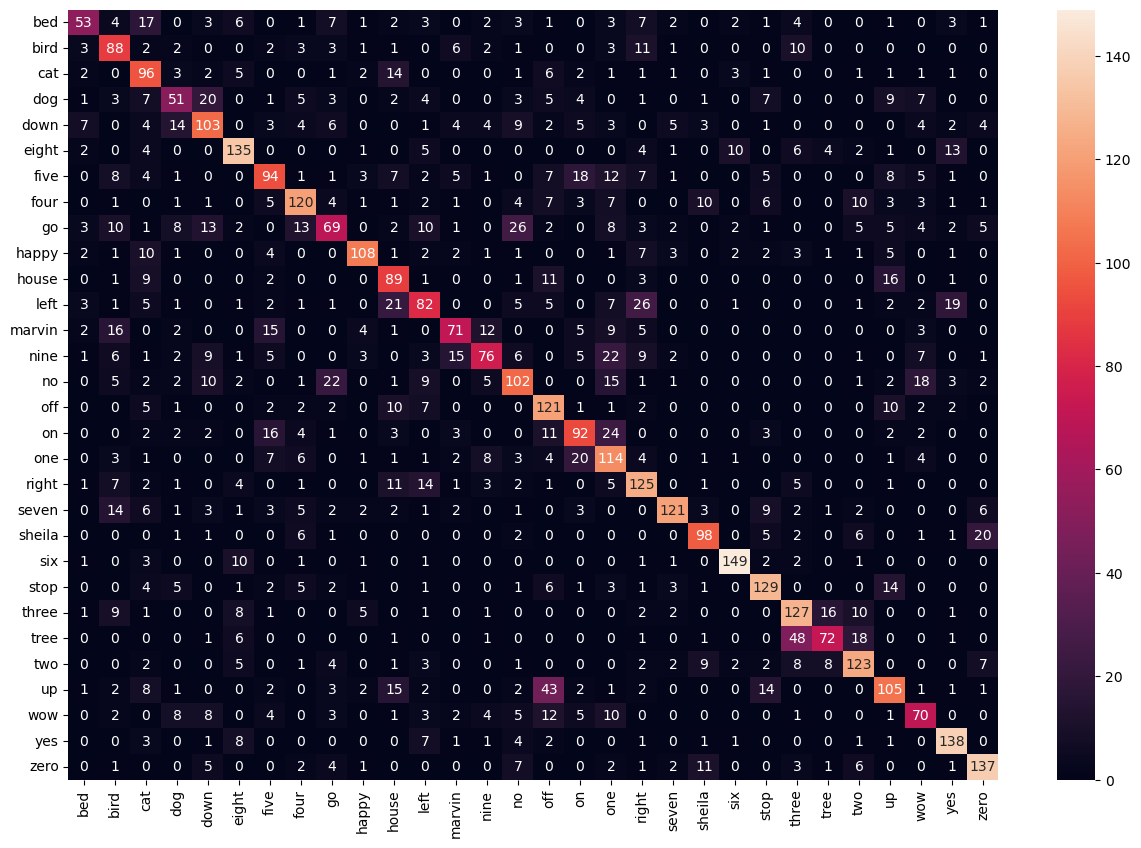

In [29]:
encoder = LabelEncoder()
y = encoder.fit_transform(train_data[["label"]])

plt.figure(figsize=(15,10))
seaborn.heatmap(
    pandas.DataFrame(
        confusion_matrix(y_test, y_pred),
        index=encoder.classes_,
        columns=encoder.classes_
    ),
    fmt='d',
    annot=True
)

_Consider and evaluate options for optimizing the network architecture_

In [ ]:
from tensorflow import keras

In [18]:
input_shape = (128, 32, 1) # same as the previous milestone
n_classes = 30

In [19]:
opt_net = keras.models.Sequential(
    [
        keras.layers.Convolution2D(
            input_shape=input_shape,
            filters=8,
            kernel_size=(3,3),
            activation="relu",
        ),
        keras.layers.MaxPooling2D(
            pool_size=(2,2)
        ),
        keras.layers.BatchNormalization(),
        keras.layers.Convolution2D(
            filters=16,
            kernel_size=(3,3),
            activation="relu"
        ),
        keras.layers.MaxPooling2D(
            pool_size=(2,2)
        ),
        keras.layers.BatchNormalization(),
        keras.layers.Convolution2D(
            filters=32,
            kernel_size=(3,3),
            activation="relu"
        ),
        keras.layers.MaxPooling2D(
            pool_size=(2,2)
        ),
        keras.layers.BatchNormalization(),
        keras.layers.Flatten(),
        keras.layers.Dense(
            units=64,
            activation="relu"
        ),
        keras.layers.Dropout(0.2),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(
            units=32,
            activation="relu"
        ),
        keras.layers.Dropout(0.2),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(
            units=n_classes,
            activation="softmax"
        )
        
    ]
)

In [20]:
opt_net.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=[
        "accuracy", 
    ]
)

In [21]:
history = opt_net.fit(
    X_train,
    y_train,
    epochs=100,
    verbose=True,
    validation_split=0.2,
    callbacks=[
        keras.callbacks.EarlyStopping(
            monitor="val_accuracy",
            min_delta=0.0001,
            patience=4,
        )
    ],
)

Epoch 1/100
1150/1150 [==============================] - 113s 94ms/step - loss: 2.4584 - accuracy: 0.2922 - val_loss: 1.4473 - val_accuracy: 0.6206
Epoch 2/100
1150/1150 [==============================] - 171s 148ms/step - loss: 1.4347 - accuracy: 0.5758 - val_loss: 0.7965 - val_accuracy: 0.7839
Epoch 3/100
1150/1150 [==============================] - 518s 451ms/step - loss: 1.0768 - accuracy: 0.6799 - val_loss: 0.6451 - val_accuracy: 0.8184
Epoch 4/100
1150/1150 [==============================] - 258s 225ms/step - loss: 0.9200 - accuracy: 0.7272 - val_loss: 0.5603 - val_accuracy: 0.8407
Epoch 5/100
1150/1150 [==============================] - 167s 145ms/step - loss: 0.8279 - accuracy: 0.7560 - val_loss: 0.5499 - val_accuracy: 0.8409
Epoch 6/100
1150/1150 [==============================] - 126s 110ms/step - loss: 0.7643 - accuracy: 0.7726 - val_loss: 0.4897 - val_accuracy: 0.8591
Epoch 7/100
1150/1150 [==============================] - 151s 131ms/step - loss: 0.7077 - accuracy: 0.7910 

In [24]:
pred = opt_net.predict(X_test)
y_pred_opt = np.argmax(pred, axis=1)

160/160 [==============================] - 2s 9ms/step


In [26]:
from sklearn.metrics import accuracy_score, f1_score
accuracy_score(y_test, y_pred_opt)

0.8919553728714034

In [27]:
f1_score(y_test, y_pred_opt, average="macro")

0.8928420932253864

<AxesSubplot:>

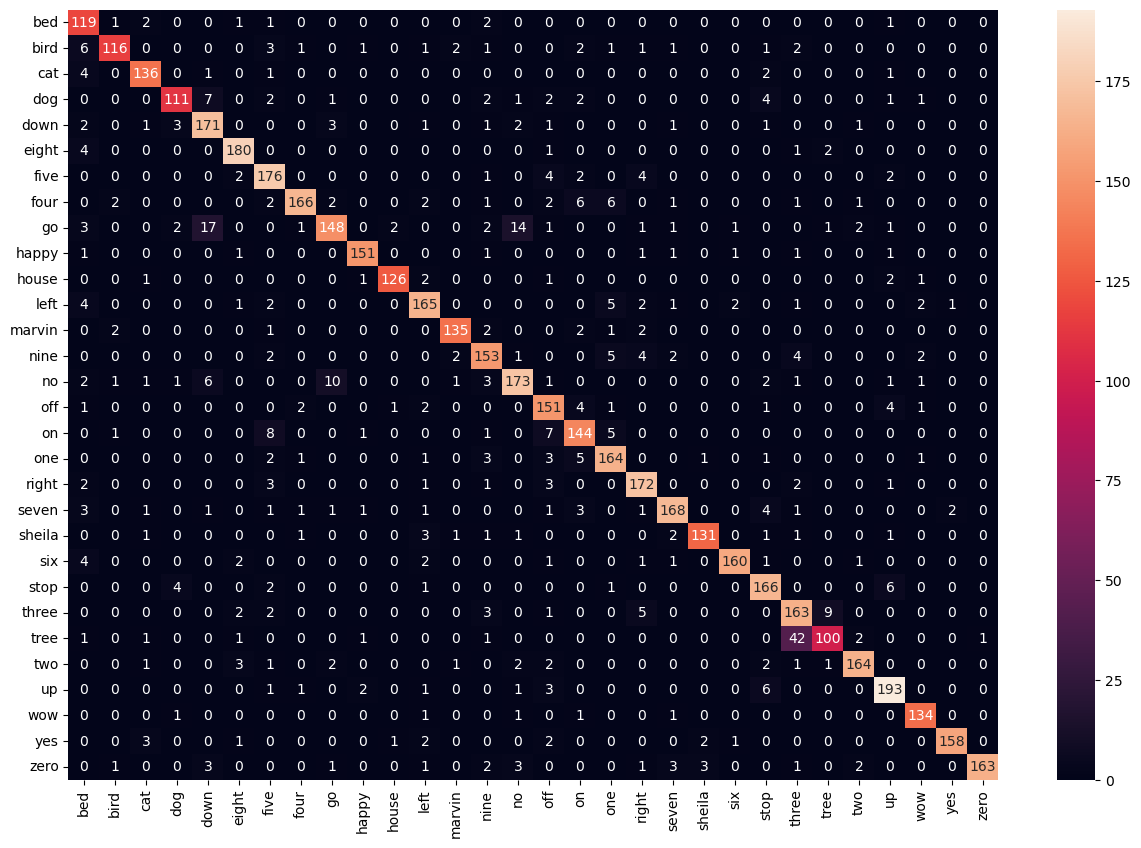

In [28]:
plt.figure(figsize=(15,10))
seaborn.heatmap(
    pandas.DataFrame(
        confusion_matrix(y_test, y_pred_opt),
        index=encoder.classes_,
        columns=encoder.classes_
    ),
    fmt='d',
    annot=True
)